In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
from math import *
%matplotlib inline
sns.set_style("darkgrid")

In [ ]:
'''
Program 1 Implement Linear regression
'''

diab = load_diabetes()
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
diab_df = pd.DataFrame(diab['data'], columns=diab['feature_names'])
diab_df['target'] = diab['target']
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
diab_arr = diab_df.loc[:,diab['feature_names']].to_numpy()
diab_y = diab_df.loc[:,'target'].to_numpy()
diab_arr_train, diab_arr_test = diab_arr[:-30,:], diab_arr[-30:,:]  # split dataset into train and test dataset
diab_y_train, diab_y_test = diab_y[:-30], diab_y[-30:]
diab_arr_train.shape

(412, 10)

In [ ]:
# calculate coefficients for multiple linear regression using OLS
W = np.matmul(np.linalg.inv(np.matmul(diab_arr_train.T,diab_arr_train)),diab_arr_train.T)
W = np.matmul(W,diab_y_train)

In [ ]:
# generate the linear regression model
def model(W, x):
  return np.matmul(W,x)

# test the model
diab_y_pred = model(diab_arr_test, W)

In [ ]:
'''
Program 3 Part A Metrics for Linear Regression
'''
# test the regression model using evaluation metrics like MAE, MSE, RMSE
# A) Using MAE loss by defining the loss function
mae_loss = 0.0
for (i,j) in zip(diab_y_pred, diab_y_test):
  mae_loss += np.abs(i-j)

mae_loss /= len(diab_y_pred)
print("Mean Absolute Loss is "+str(mae_loss))

# B) Using MSE loss by defining the loss function
mse_loss = 0.0
for (i,j) in zip(diab_y_pred, diab_y_test):
  mse_loss += ((i-j)**2)

mse_loss /= len(diab_y_pred)
print("Mean Squared Loss is "+str(mse_loss))

# C) Using RMSE loss by defining the loss function
rmse_loss = np.sqrt(mse_loss)
print("Root Mean Squared Loss is "+str(rmse_loss))

Mean Absolute Loss is 144.5145547916642
Mean Squared Loss is 22593.968011659726
Root Mean Squared Loss is 150.3129003501021


In [ ]:
'''
Program 2 Implement Logistic regression
'''

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_arr = iris_df.loc[:,iris['feature_names']].to_numpy()
iris_y = iris_df.loc[:,'target'].to_numpy()

# creating random indices to split data into train and test data
all_indices = np.arange(0,iris_arr.shape[0])
random_indices = np.random.choice(a=all_indices, size=30, replace=False)
rem_indices = np.setdiff1d(all_indices, random_indices)

iris_arr_train, iris_arr_test = iris_arr[rem_indices], iris_arr[random_indices]  # split dataset into train and test dataset
iris_y_train, iris_y_test = iris_y[rem_indices], iris_y[random_indices]
iris_arr_test.shape

(30, 4)

In [ ]:
# define sigmoid activation function
def sigmoid(x):
  y =  1/(1+np.exp(-x))
  if y<0.45:
    return 0
  elif y<0.75:
    return 1
  else:
    return 2

# for backpropagation purpose
def sigmoid_prime(x):
  return sigmoid(x)*(1-sigmoid(x))

In [ ]:
# create the model
W = np.random.randn(iris_arr_train.shape[1],1)    # randomly initialise weights of logistic regression model
# feedforward values

learn_rate = 0.007 # learning rate
epochs = 100
for i in range(epochs):
  # train over all examples
  delta = np.zeros(W.shape)
  loss = 0.0
  for j in range(iris_arr_train.shape[0]):
    labels = sigmoid(np.matmul(iris_arr_train[j], W))
    error_term = (iris_y_train[j] - labels)
    sigma_prime = sigmoid_prime(np.matmul(iris_arr_train[j], W))
    delta += (error_term*sigma_prime*iris_arr_train[j])[:,None]
    loss += error_term**2
  W += learn_rate*(delta/iris_arr_train.shape[0])
  loss = (1/(iris_arr_train.shape[0]))*loss
  if i%10==0:
    #print training loss
    print("Running Loss: {}".format(loss))


Running Loss: 1.6166666666666667
Running Loss: 1.6666666666666667
Running Loss: 1.6666666666666667
Running Loss: 1.6666666666666667
Running Loss: 1.6666666666666667
Running Loss: 1.6666666666666667
Running Loss: 1.6666666666666667
Running Loss: 1.6666666666666667
Running Loss: 1.6666666666666667
Running Loss: 1.6666666666666667


In [ ]:
'''
Program 3 Part B Metrics for Logistic Regression
'''

# ALERT: Don't initialise these values as floating point numbers!
true_correct = 0
true_incorrect = 0
false_correct = 0
false_incorrect = 0

base_label = 2 # assuming 2 to be the label for which 2-> true else false

for i in range(iris_arr_test.shape[0]):
  label = sigmoid(np.matmul(iris_arr_test[i], W))
  if label==base_label and iris_y_test[i]==base_label:
    true_correct+=1
  elif label!=base_label and iris_y_test[i]==base_label:
    false_incorrect+=1
  elif label==base_label and iris_y_test[i]!=base_label:
    true_incorrect+=1
  else:
    false_correct+=1

#calculating accuracy
accuracy = (true_correct/iris_y_test.shape[0])*100
print("Accuracy is "+str(accuracy)+"%")

#calculating precision
precision = true_correct/(true_correct+true_incorrect)
print("Precision is "+str(precision))

#calculating recall
recall = true_correct/(true_correct+false_incorrect)
print("Recall is "+str(recall))

#calculating F1 Score
F1_score = precision*recall/(precision+recall)
print("F1-score is "+str(F1_score))

Accuracy is 33.33333333333333%
Precision is 0.3333333333333333
Recall is 1.0
F1-score is 0.25


In [ ]:
# creating the confusion matrix of the logistic regression model as a Pandas DataFrame
confusion_matrix = pd.DataFrame(index=['Predicted Labels: True','Predicted Labels: False'],
                                columns=['Actual Labels: True','Actual Labels: False'])
confusion_matrix['Actual Labels: True']['Predicted Labels: True'] = true_correct
confusion_matrix['Actual Labels: True']['Predicted Labels: False'] = false_incorrect
confusion_matrix['Actual Labels: False']['Predicted Labels: True'] = false_correct
confusion_matrix['Actual Labels: False']['Predicted Labels: False'] = true_incorrect

# displaying the confusion matrix
confusion_matrix

,Actual Labels: True,Actual Labels: False
Predicted Labels: True,10,0
Predicted Labels: False,0,20


In [ ]:
#ROUGH work
# labels = sigmoid(np.matmul(iris_arr_train[0], W))
# error_term = (iris_y_train[0] - labels)
# sigma_prime = sigmoid_prime(labels)
# ((error_term*sigma_prime*iris_arr_train[0])/iris_arr_train.shape[0]).shape

# iris_arr[random_indices]
# rem_indices

# iris_arr_train.shape[0]

# len(np.setdiff1d(all_indices, random_indices))
# np.setdiff1d(all_indices, random_indices)
len(rem_indices)

120

In [ ]:
# nueral network feedforward
'''
Experiment 4: Implement a feedforward nueral network incorporating hyperparameter tuning for optimal performance
'''

class NeuralNetwork:
    def __init__(self, input_dim, hidden_dims, output_dim):
      self.input_dim = input_dim
      self.hidden_dims = hidden_dims
      self.output_dim = output_dim
      self.weights = []
      self.biases = []
      self.activations = []

      # Initialize weights and biases
      if len(hidden_dims) == 0:
        self.weights.append(np.random.randn(input_dim, output_dim))
        self.biases.append(np.zeros((1, output_dim)))
        self.activations.append(np.zeros((1, output_dim)))
      else:
        self.weights.append(np.random.randn(input_dim, hidden_dims[0]))
        self.biases.append(np.zeros((1, hidden_dims[0])))
        self.activations.append(np.zeros((1, hidden_dims[0])))

        for i in range(1, len(hidden_dims)):
            self.weights.append(np.random.randn(hidden_dims[i-1], hidden_dims[i]))
            self.biases.append(np.zeros((1, hidden_dims[i])))
            self.activations.append(np.zeros((1, hidden_dims[i])))

        self.weights.append(np.random.randn(hidden_dims[-1], output_dim))
        self.biases.append(np.zeros((1, output_dim)))
        self.activations.append(np.zeros((1, output_dim)))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_propagation(self, X):
        self.activations[0] = self.sigmoid(np.dot(X, self.weights[0]) + self.biases[0])

        for i in range(1, len(self.hidden_dims) + 1):
            self.activations[i] = self.sigmoid(np.dot(self.activations[i-1], self.weights[i]) + self.biases[i])

        return self.activations[-1]

    def backward_propagation(self, X, y, learning_rate):
        m = X.shape[0]
        error = self.activations[-1] - y

        for i in range(len(self.hidden_dims), -1, -1):
            if i == len(self.hidden_dims):
                delta = error  *self.activations[i]*  (1 - self.activations[i])
            else:
                delta = np.dot(delta, self.weights[i+1].T)  *self.activations[i]*  (1 - self.activations[i])

            self.weights[i] -= learning_rate * np.dot(self.activations[i-1].T, delta) / m
            self.biases[i] -= learning_rate * np.mean(delta, axis=0)

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward propagation
            outputs = self.forward_propagation(X)

            # Backward propagation
            self.backward_propagation(X, y, learning_rate)

            # Calculate loss
            loss = np.mean((outputs - y) ** 2)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        return np.round(self.forward_propagation(X))

# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize the neural network
nn = NeuralNetwork(input_dim=2, hidden_dims=[2, 3, 5], output_dim=1)

# Train the neural network
nn.train(X, y, epochs=1000, learning_rate=0.1)

# Make predictions
predictions = nn.predict(X)
print("Predictions:")
print(predictions)

Epoch 0: Loss = 0.2969
Epoch 100: Loss = 0.2517
Epoch 200: Loss = 0.2500
Epoch 300: Loss = 0.2499
Epoch 400: Loss = 0.2499
Epoch 500: Loss = 0.2499
Epoch 600: Loss = 0.2499
Epoch 700: Loss = 0.2499
Epoch 800: Loss = 0.2499
Epoch 900: Loss = 0.2499
Predictions:
[[1.]
 [1.]
 [0.]
 [0.]]


In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# set up the parameters for decision tree classifier algorithm
dt = DecisionTreeClassifier(criterion="entropy", max_depth=(iris_df.shape[1]-1)) # using entropy to measure the information of each node of the decision tree and limiting maximum depth of the decision tree

In [ ]:
'''
Experiment 5: Implementation of random forest classifier
'''
# splitting training data into 3 samples to be trained on 3 decion trees

random_indices = np.random.choice(a=all_indices, size=30, replace=False)
rem_indices = np.setdiff1d(all_indices, random_indices)

iris_dtA = iris_df.loc[list(rem_indices[:40])] # for decision tree 1
iris_dtB = iris_df.loc[list(rem_indices[40:80])] # for decision tree 2
iris_dtC = iris_df.loc[list(rem_indices[80:])] # for decision tree 3

In [ ]:
# for first sample A
iris_trainA = iris_dtA[iris['feature_names']]
iris_labelA = iris_dtA['target']

dta = dt.fit(iris_trainA, iris_labelA)  # training first decision tree based on first data subset

# for second sample B
iris_trainB = iris_dtB[iris['feature_names']]
iris_labelB = iris_dtB['target']

dtb = dt.fit(iris_trainB, iris_labelB)  # training second decision tree based on second data subset

# for third sample C
iris_trainC = iris_dtC[iris['feature_names']]
iris_labelC = iris_dtC['target']

dtc = dt.fit(iris_trainC, iris_labelC)  # training third decision tree based on third data subset

In [ ]:
# testing all the decision on the test data
dta_pred = dta.predict(iris_arr_test)[:,None];
dtb_pred = dtb.predict(iris_arr_test)[:,None];
dtc_pred = dtc.predict(iris_arr_test)[:,None];

# merging all the made predictions and comparing against iris_y_test
all_pred = np.concatenate((dta_pred, dtb_pred, dtc_pred), axis=1);
all_pred;

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# using voting method to create ensemble of decision trees
final_pred_randf = []
for i in range(all_pred.shape[0]):
  count = []
  for j in range(all_pred.shape[1]):
    count.append(list(all_pred[i]).count(all_pred[i][j]))
  idx = np.argmax(count)
  final_pred_randf.append(all_pred[i][idx])

# testing random forest predicitons with out test labels
test_results = final_pred_randf == iris_y_test

# printing accuracy of the random forest classifier
test_accuracy = np.sum(test_results)/test_results.shape[0]
print("The test accuracy of the random forest classifier comes around {}%".format(test_accuracy*100))

The test accuracy of the random forest classifier comes around 46.666666666666664%


In [ ]:
'''
Assignment (Unit 2) Implementation of Decision tree algorithm on PlayTennis dataset
'''

data = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'Temperature': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'Humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'Wind': ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
    'PlayTennis': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

def check_purity(data):

    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

def classify_data(data):

    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]

    return classification

def get_potential_splits(data):

    potential_splits = {}
    for column_index in range(data.shape[1]-1):  # excluding the last column which is the label
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        potential_splits[column_index].extend(unique_values)

    return potential_splits

def split_data(data, split_column, split_value):

    split_column_values = data[:, split_column]

    data_below = data[split_column_values == split_value]
    data_above = data[split_column_values !=  split_value]

    return data_below, data_above

def calculate_entropy(data):

    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

def calculate_overall_entropy(data_below, data_above):

    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below)
                      + p_data_above * calculate_entropy(data_above))

    return overall_entropy

def determine_best_split(data, potential_splits):

    overall_entropy = 9999
    for column_index in potential_splits.keys():
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value

    return best_split_column, best_split_value

def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):

    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df


    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)

        return classification


    # recursive part
    else:
        counter += 1

        # helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)

        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} == {}".format(feature_name, split_value)
        sub_tree = {question: []}

        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)

        # If the answers are the same, then there is no point in asking the question.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

tree = decision_tree_algorithm(df)
pprint(tree)


'''
Assignment (Unit 2) Implementation of Gradient Boosting algorithm on Student Interactiveness dataset
'''

import numpy as np
import pandas as pd

train_data = pd.DataFrame(columns = ['Interactiveness', 'Practical Knowledge', 'Aptitude', 'CGPA'])
train_data.loc[1] = ['Yes', 'Good', 'Good', 9.5]
train_data.loc[2] = ['No','Average','Good',8.2]
train_data.loc[3] = ['No','Good','Good',9.1]
train_data.loc[4] = ['No','Average','Poor',6.8]
train_data.loc[5] = ['Yes','Good','Good',8.5]
train_data.loc[6] = ['Yes','Good','Good',9.5]
train_data.loc[7] = ['Yes','Average','Poor',7.9]
train_data.loc[8] = ['No','Good','Good',9.1]
train_data.loc[9] = ['Yes','Good','Good',8.8]
train_data.loc[10] = ['Yes','Average','Poor',9.0]

in_features = list(train_data.columns)[:-1] # get the input features for decision stumps
out_feature = list(train_data.columns)[-1] # get the output variable to be predicted
y = np.array(train_data.loc[:,out_feature]) # get the actual predictions

pred = {}
it = 1
y_pred = np.zeros(train_data.shape[0]) # array of zeros consisting predictions to be made

for i in in_features:
  # proceed with training the decision stumps
  pred[i + str(it)] =  {}  # np.zeros(len(np.unique(train_data.loc[:,i])))
  for j in np.unique(train_data.loc[:,i]):
    pred[i + str(it)][j] = sum(train_data.loc[train_data.loc[:,i]==j,out_feature])/sum(train_data.loc[:,i]==j)
    train_data.loc[train_data.loc[:,i]==j,out_feature] = pred[i + str(it)][j]
  y_pred += train_data.loc[:,out_feature]
  # compute the residual and train next decision stump on it
  train_data.loc[:,out_feature] = y - y_pred
  it += 1

# get the predictions from the trained gradient boosted trees
print(y_pred)

{'Outlook == overcast': ['yes',
                         {'Humidity == normal': [{'Wind == weak': ['yes',
                                                                   {'Temperature == mild': ['yes',
                                                                                            'no']}]},
                                                 {'Outlook == sunny': ['no',
                                                                       {'Wind == weak': ['yes',
                                                                                         'no']}]}]}]}
1     9.344841
2     7.764286
3     8.778175
4     7.522222
5     9.344841
6     9.344841
7     8.088889
8     8.778175
9     9.344841
10    8.088889
Name: CGPA, dtype: float64


In [ ]:
'''
Experiment 6: Implementation of gradient boosting for classification
'''

import numpy as np
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def log_loss_derivative(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred))

class DecisionTree:
    def __init__(self, max_depth=1):
        self.max_depth = max_depth
        self.tree = {}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)

    def build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return {'leaf': True, 'class': int(np.argmax(np.bincount(y.astype(int))))}

        best_feature, best_threshold = self.find_best_split(X, y)
        left_indices = X.loc[:, best_feature] == best_threshold
        right_indices = X.loc[:, best_feature] != best_threshold

        tree = {
            'leaf': False,
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self.build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self.build_tree(X[right_indices], y[right_indices], depth + 1)
        }

        return tree

    def find_best_split(self, X, y):
        best_gini = float('inf')
        best_feature = None
        best_threshold = None

        for feature in list(X.columns):
            thresholds = np.unique(X.loc[:, feature])
            for threshold in thresholds:
                left_indices = X.loc[:, feature] == threshold
                right_indices = X.loc[:, feature] != threshold

                gini = self.calculate_gini(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_gini(self, y_left, y_right):
        p_left = np.mean(y_left)
        p_right = np.mean(y_right)
        gini_left = 1 - p_left ** 2 - (1 - p_left) ** 2
        gini_right = 1 - p_right ** 2 - (1 - p_right) ** 2
        gini = (len(y_left) * gini_left + len(y_right) * gini_right) / (len(y_left) + len(y_right))
        return gini

    def predict(self, X):
        return np.array(self.predict_sample(X))

    def predict_sample(self, x):
        node = self.tree
        while not node['leaf']:
            if sum(x.loc[:, node['feature']] == node['threshold']):
                node = node['left']
            else:
                node = node['right']
        return node['class']

class GradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.estimators = []

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)
        for _ in range(self.n_estimators):
            residual = y - sigmoid(y_pred)
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.estimators.append(tree)
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.estimators:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(sigmoid(y_pred))

train_data = pd.DataFrame(columns = ['Interactiveness', 'Practical Knowledge', 'Aptitude', 'CGPA'])
train_data.loc[1] = ['Yes', 'Good', 'Good', 9.5]
train_data.loc[2] = ['No','Average','Good',8.2]
train_data.loc[3] = ['No','Good','Good',9.1]
train_data.loc[4] = ['No','Average','Poor',6.8]
train_data.loc[5] = ['Yes','Good','Good',8.5]
train_data.loc[6] = ['Yes','Good','Good',9.5]
train_data.loc[7] = ['Yes','Average','Poor',7.9]
train_data.loc[8] = ['No','Good','Good',9.1]
train_data.loc[9] = ['Yes','Good','Good',8.8]
train_data.loc[10] = ['Yes','Average','Poor',9.0]

X_gb = train_data.drop('CGPA', axis=1)
y_gb = np.array(train_data.loc[:,'CGPA'])

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1)
model.fit(X_gb, y_gb)

test_data = pd.DataFrame(columns = ['Interactiveness', 'Practical Knowledge', 'Aptitude'])
test_data.loc[1] = ['Yes','Good','Poor']
Xgb_test = test_data
predictions = model.predict(Xgb_test)
print(predictions)

[1.]


In [ ]:
'''
Experiment 7 Part A: Reduce dimensions of data using Principal Component Analysis
'''
def preprocess_data(X):
    # Perform any necessary preprocessing steps, such as scaling or normalization
    # You can customize this function based on your specific dataset
    X = X.astype(float)

    # Subtract the mean from each feature
    X -= np.mean(X, axis=0)

    return X

def calculate_covariance_matrix(X):
    # Calculate the covariance matrix of the dataset
    covariance_matrix = np.cov(X.T)

    return covariance_matrix

def calculate_eigenvectors(covariance_matrix):
    # Calculate the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvectors based on the eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    return sorted_eigenvectors

def reduce_dimensions(X, eigenvectors, k):
    # Project the original data onto the selected principal components
    reduced_X = np.dot(X, eigenvectors[:, :k])

    return reduced_X

# Example usage
X_dr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Preprocess the data
X_dr = preprocess_data(X_dr)

# Calculate the covariance matrix
covariance_matrix = calculate_covariance_matrix(X_dr)

# Calculate the eigenvectors
eigenvectors = calculate_eigenvectors(covariance_matrix)

# Reduce the dimensions
k = 2  # Number of principal components to keep
reduced_X = reduce_dimensions(X_dr, eigenvectors, k)

print("Original Data:")
print(X)
print("Reduced Data:")
print(reduced_X)

Original Data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Reduced Data:
[[-5.19615242e+00  4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 5.19615242e+00 -4.44089210e-16]]


In [ ]:
'''
Experiment 7 Part B: Reduce dimensions using t- Stochastic Neighbour embedding (t-SNE) algorithm
reference for studying about t-SNE: https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a
'''
from sklearn.manifold import TSNE

tsne_model = TSNE(perplexity=2)
# fit the data into the embedding and reduce the transformed embedding as per t-SNE
reduced_X = tsne_model.fit_transform(X_dr)

print("Original Data:")
print(X_dr)
print("Reduced Data:")
print(reduced_X)

Original Data:
[[-3. -3. -3.]
 [ 0.  0.  0.]
 [ 3.  3.  3.]]
Reduced Data:
[[ 526.55255    0.     ]
 [   0.         0.     ]
 [-526.55255    0.     ]]


In [ ]:
'''
Experiment 8 Part A: Implementation of k-means clustering algorithm
'''
def k_means(X, k, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1), axis=-1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Generate random data
np.random.seed(42)
X_km = np.random.rand(100, 2)

# Run k-means clustering
k = 4
labels, centroids = k_means(X_km, k)

print("Cluster labels:", labels)
print("Centroids:", centroids)

Cluster labels: [3 0 1 3 0 3 2 1 1 2 2 1 3 1 2 2 3 0 2 0 1 3 3 1 2 0 0 0 1 1 2 0 1 3 3 2 3
 0 2 2 0 2 1 0 0 3 0 0 2 1 3 1 0 3 2 2 0 0 2 0 0 2 1 0 1 2 1 0 0 3 0 2 2 0
 1 0 1 0 0 3 3 0 3 2 1 2 2 2 0 2 2 0 3 0 2 3 0 1 0 0]
Centroids: [[0.80016224 0.61573864]
 [0.17819983 0.38746617]
 [0.5138739  0.16611676]
 [0.18212032 0.81722435]]


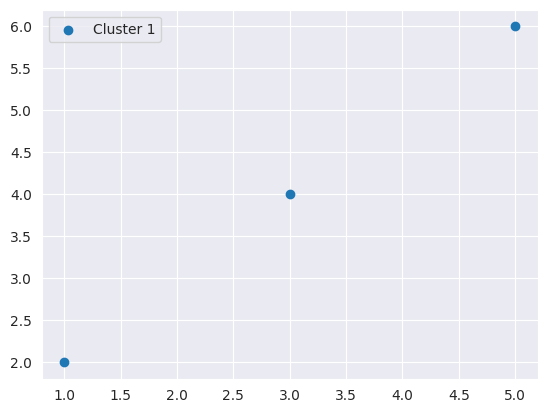

In [ ]:
'''
Experiment 8 Part B: Implementation of hierarchical clustering
'''

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def compute_distance_matrix(data):
    num_points = len(data)
    dist_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            dist_matrix[i, j] = euclidean_distance(data[i], data[j])
    return dist_matrix

data = np.array([[1, 2], [3, 4], [5, 6]])
dist_matrix = compute_distance_matrix(data)

# perform agglomerative clustering based on complete link distance metric
def hierarchical_clustering(dist_matrix):
    num_points = len(dist_matrix)
    clusters = [[i] for i in range(num_points)]
    while len(clusters) > 1:
        min_dist = np.inf
        merge_indices = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                for point1 in clusters[i]:
                    for point2 in clusters[j]:
                        dist = dist_matrix[point1, point2]
                        if dist < min_dist:
                            min_dist = dist
                            merge_indices = (i, j)
        i, j = merge_indices
        clusters[i].extend(clusters[j])
        del clusters[j]
    return clusters

clusters = hierarchical_clustering(dist_matrix)

def plot_clusters(data, clusters):
    for i, cluster in enumerate(clusters):
        points = data[cluster]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')
    plt.legend()
    plt.show()

plot_clusters(data, clusters)

{1: '12', 2: '120', 3: ['120', '34'], 4: '12034'}
Time taken to execute:- 0.17607951164245605 seconds


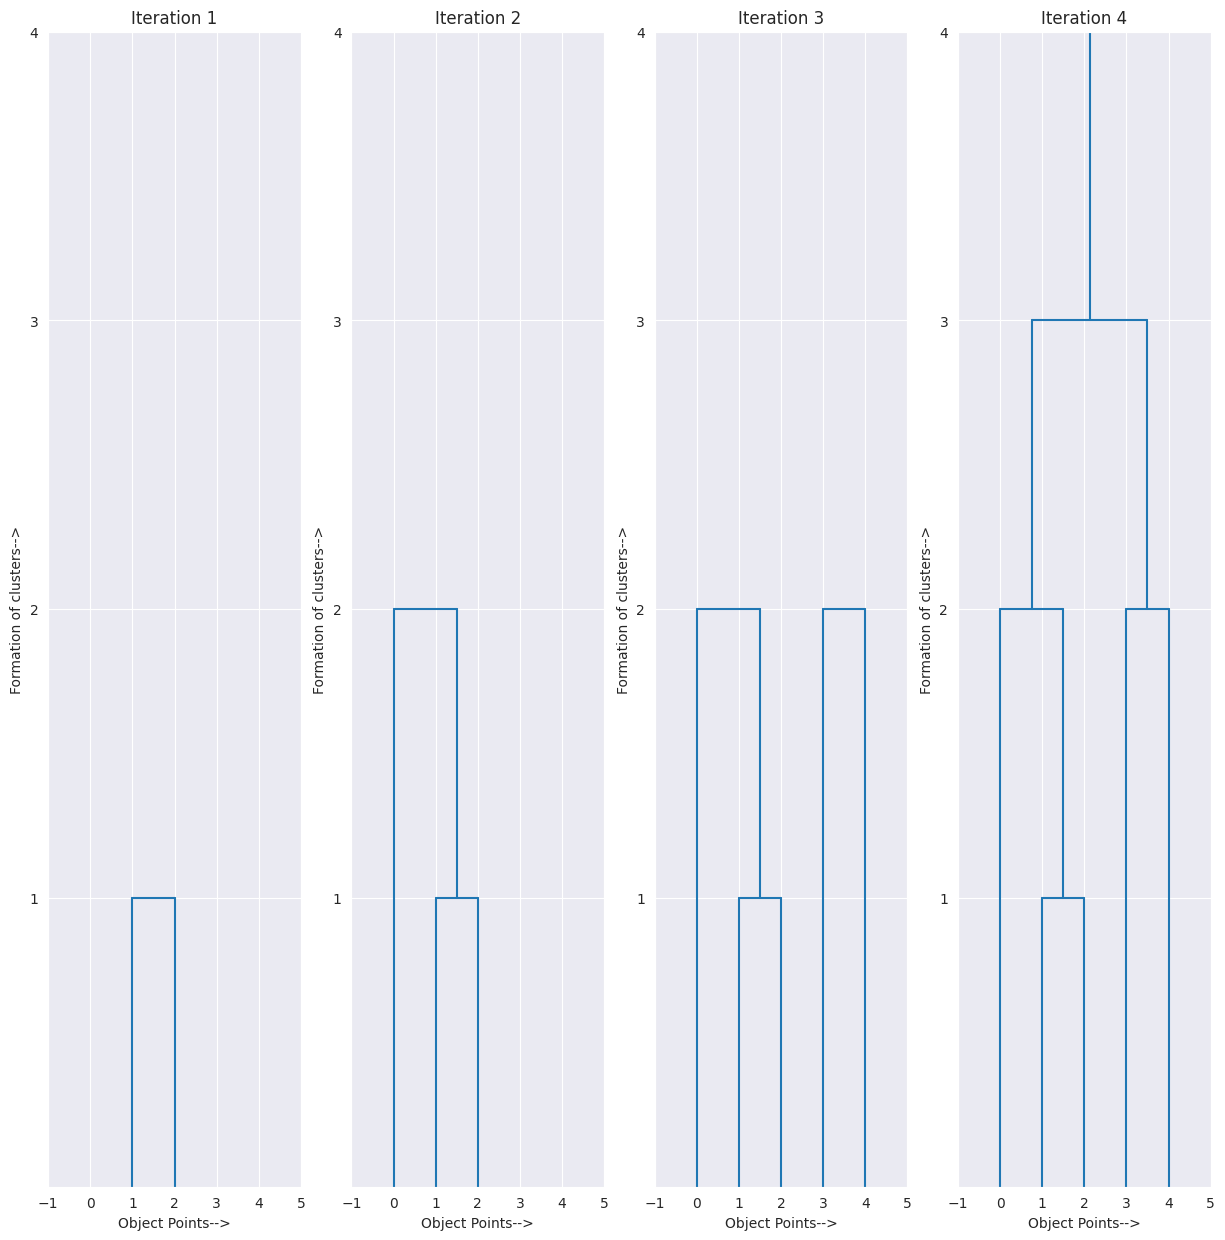

In [ ]:
'''
Assignment (Unit 3) Implementation of Hierarchical clustering algorithm on a points dataset
'''

from itertools import combinations
import time

start_time = time.time()

points_df = pd.DataFrame(columns=['Objects','X','Y'])
points_df.loc[0,:] = [0,1,4]
points_df.loc[1,:] = [1,2,8]
points_df.loc[2,:] = [2,5,10]
points_df.loc[3,:] = [3,12,18]
points_df.loc[4,:] = [4,14,28]
min_dist = np.inf
best_idx = [-1, -1]  # randomly initialise indices for the points closest
cluster = {}
it = 1

distances_points = np.zeros((points_df.shape[0],points_df.shape[0]))

for i in range(points_df.shape[0]):
  distances_points[i][i] = np.inf # distance between same points not defined

for i in range(points_df.shape[0]):
  for j in range(i,points_df.shape[0]):
    if j==i:
      continue
    distances_points[i][j] = sqrt((points_df.loc[i,'X']-points_df.loc[j,'X'])**2 + (points_df.loc[i,'Y']-points_df.loc[j,'Y'])**2)
    if distances_points[i][j] < min_dist:
      best_idx[0] = str(i)
      best_idx[1] = str(j)
      min_dist = distances_points[i][j]

distances_points = distances_points + distances_points.T  # saving matrix calculations by taking only half of array computations

cluster[it] = best_idx[0]+best_idx[1]
rem_points = [str(i) for i in np.setdiff1d(np.array(points_df.loc[:,'Objects']), np.array([int(i) for i in set(cluster[it])]))]
min_dist = np.inf

while len(cluster[it])!=points_df.shape[0]:
  if isinstance(cluster[it], list):
    distances_track = pd.DataFrame(columns = cluster[it], index = cluster[it])
  else:
    distances_track = pd.DataFrame(columns = [cluster[it]]+rem_points, index = [cluster[it]]+rem_points)
  for i in distances_track.columns:
    distances_track.loc[i,i] = np.inf # distance between same points not defined

  for i in distances_track.index:
    for j in distances_track.columns:
      if j==i:
        continue
      # another if-else
      if len(i)>1 or len(j)>1:
        # presence of an already existing cluster
        point_comb = list(combinations([i[p] for p in range(len(i))]+[j[p] for p in range(len(j))],2))
        i_list = [i[p] for p in range(len(i))]
        j_list = [j[p] for p in range(len(j))]
        dist_arr = []
        # implementing single link hierarchical distance metric
        for comb in point_comb:
          if len(np.intersect1d(comb,i_list))==2 or len(np.intersect1d(comb,j_list))==2:
            continue
          comb = list(map(int, comb))
          dist_arr.append(distances_points[comb[0]][comb[1]])
        distances_track.loc[i,j] = min(dist_arr)
      else:
        distances_track.loc[i,j] = distances_points[int(i)][int(j)]
      if distances_track.loc[i,j] < min_dist:
        best_idx[0] = i
        best_idx[1] = j
        min_dist = distances_track.loc[i,j]

  # Implements further logic and completes cluster dictionary as formed
  it += 1
  prev_cluster_points = [cluster[it-1][p] for p in range(len(cluster[it-1]))]
  current_cluster_points = [best_idx[0][i] for i in range(len(best_idx[0]))] + [best_idx[1][i] for i in range(len(best_idx[1]))]
  if len(current_cluster_points)==points_df.shape[0]:
    break
  if len(np.intersect1d(prev_cluster_points, current_cluster_points))!=0:
    # points agglomerate to previously made cluster
    cluster[it] = best_idx[0]+best_idx[1]
    rem_points = [str(i) for i in np.setdiff1d(np.array(points_df.loc[:,'Objects']), np.array([int(i) for i in set(cluster[it])]))]
  else:
    # different cluster has been made
    cluster[it] = []
    cluster[it].append(cluster[it-1])
    cluster[it].append(best_idx[0]+best_idx[1])
  min_dist = np.inf

cluster[it] = ''.join(current_cluster_points)
print(cluster)  # prints the sequence of how clusters are agglomerated across iterations

# plots the dendogram
fig, ax = plt.subplots(1, len(cluster), figsize=(15,15))
for i in ax:
  i.set_xticks(sorted(list(points_df.loc[:,'Objects']) + [-1, points_df.shape[0]]))
  i.set_yticks(np.arange(1,5))
  i.set_xlabel("Object Points-->")
  i.set_ylabel("Formation of clusters-->")

cluster_remake = {}
for i in range(len(cluster)):
  ax[i].set_title("Iteration " + str(i+1))
  if isinstance(cluster[i+1], list):
    cluster_points = [int(cluster[i+1][1][j]) for j in range(len(cluster[i+1][1]))]
  else:
    cluster_points = [int(cluster[i+1][j]) for j in range(len(cluster[i+1]))]
  cluster_remake[i+1] = cluster_points

for i in range(1,len(cluster_remake)+1):
  for j in cluster_remake[1]:
      ax[i-1].axvline(x = j, ymin = 0, ymax = 0.25)
  ax[i-1].axhline(y=1, xmin = (cluster_remake[1][0]+1)/6, xmax = (cluster_remake[1][1]+1)/6)

for j in cluster_remake[3]:
  ax[2].axvline(x = j, ymin = 0, ymax = 0.5)
  ax[3].axvline(x = j, ymin = 0, ymax = 0.5)
ax[2].axhline(y=2, xmin = (cluster_remake[3][0]+1)/6, xmax = (cluster_remake[3][1]+1)/6)
ax[3].axhline(y=2, xmin = (cluster_remake[3][0]+1)/6, xmax = (cluster_remake[3][1]+1)/6)

for i in range(1,4):
  ax[i].axvline(x = 0, ymin = 0, ymax = 0.5)
  ax[i].axvline(x = 1.5, ymin = 0.25, ymax = 0.5)
  ax[i].axhline(y=2, xmin = (0+1)/6, xmax = (1.5+1)/6)

# completing the dendogram created in the last axes object (for the last iteration)
ax[3].axvline(x = 0.75, ymin = 0.5, ymax = 0.75)
ax[3].axvline(x = 3.5, ymin = 0.5, ymax = 0.75)
ax[3].axhline(y = 3, xmin = (0.75+1)/6, xmax = (3.5+1)/6)

# for the root
ax[3].axvline(x = 2.125, ymin = 0.75, ymax = 1)

end_time = time.time()
print("Time taken to execute:- {} seconds".format(end_time-start_time))

In [ ]:
'''
Assignment (Unit 3) Implementation of k-means clustering algorithm on a points dataset
'''

points_df = pd.DataFrame(columns=['Objects','X','Y'])
points_df.loc[0,:] = [1,2,4]
points_df.loc[1,:] = [2,4,6]
points_df.loc[2,:] = [3,6,8]
points_df.loc[3,:] = [4,10,4]
points_df.loc[4,:] = [5,12,4]

def kmeans(points_df, k):
  # initialise k random centroids for determining clusters
  centroids = np.random.randint(1, 15, size=(k,2))
  new_centroids = np.zeros((k,2))
  clusters = np.zeros(points_df.shape[0])
  tol = 1e-3
  print("Original centroids: ", centroids)
  while(1):
    track = 0
    for i in points_df.loc[:,['X','Y']].values:
      dist_arr = []
      for j in range(0,k):
        dist_arr.append(sqrt((i[0]-centroids[j][0])**2 + (i[1]-centroids[j][1])**2))
      idx = np.argmin(dist_arr) # find the label for the cluster
      clusters[track] = idx + 1
      track += 1
    for i in range(0,k):
      if len(points_df.loc[clusters==(i+1),['X','Y']].values)==0:
        # no value allotted cluster
        new_centroids[i,:] = centroids[i,:]
      else:
        new_centroids[i,:] = np.mean(points_df.loc[clusters==(i+1),['X','Y']].values)
    if np.abs(sum(sum(centroids-new_centroids)))<tol:
      break
    centroids = new_centroids
  print("New Centroids formed are:- ")
  print(centroids)
  print("Clusters formed are:- ")
  print(clusters)

kmeans(points_df, 2)

Original centroids:  [[10  7]
 [ 9  4]]
New Centroids formed are:- 
[[7.33333333 7.33333333]
 [4.         4.        ]]
Clusters formed are:- 
[2. 2. 1. 1. 1.]


In [ ]:
'''
Assignment (Unit 3) Implementation of nueral network perceptron as an AND gate
'''

logic_and = pd.DataFrame(columns=['X1','X2','Ydes'])
logic_and.loc[0,:] = [0,0,0]
logic_and.loc[1,:] = [0,1,0]
logic_and.loc[2,:] = [1,0,0]
logic_and.loc[3,:] = [1,1,1]

feature_values = logic_and.loc[:,['X1','X2']].values # get the feature values
target_value = logic_and.loc[:,'Ydes'].values # get the output value

# initial weights and bias
W1 = 0.3
W2 = -0.2
W0 = -0.4

# learning rate, to be used during weight update
lr = 0.2

# training epochs
epochs = 4

def step(s):
  if s < 0:
    return 0
  else:
    return 1

print("Original weights are:- ")
print(W1, W2, W0)

for i in range(epochs):
  for j in range(feature_values.shape[0]):
    yest = step(W1 * feature_values[j,0] + W2 * feature_values[j,1] + W0) # computing estimated values by perceptron
    error = target_value[j] - yest # computing error, to be used during optimisation
    del_error = lr * error # computing weight gradient
    # updating weights in direction of minimum error
    W1 += del_error * feature_values[j,0]
    W2 += del_error * feature_values[j,1]

print("Updated weights are:- ")
print(W1, W2, W0)

Original weights are:- 
0.3 -0.2 -0.4
Updated weights are:- 
0.3 0.2 -0.4


In [73]:
'''
Experiment 9: Implementation of autoencoders
'''

# Define the architecture of the autoencoder
input_size = 784  # Size of the input data
hidden_size = 32  # Size of the hidden layer
output_size = 784  # Size of the output data

# Initialize the weights and biases
W1 = np.random.randn(hidden_size, input_size)
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size)
b2 = np.zeros((output_size, 1))

# Define the forward pass function
def forward_pass(X, W1, b1, W2, b2):
    # Compute the hidden layer activations
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)  # ReLU activation function

    # Compute the output layer activations
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2

    return A2, A1

# Define the backward pass function
def backward_pass(X, A2, A1, W2):
    # Compute the gradients of the output layer
    dZ2 = A2 - X
    dW2 = np.dot(dZ2, A1.T) / X.shape[1]
    db2 = np.sum(dZ2, axis=1, keepdims=True) / X.shape[1]

    # Compute the gradients of the hidden layer
    dZ1 = np.dot(W2.T, dZ2) * (A1 > 0)
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis=1, keepdims=True) / X.shape[1]

    return dW2, db2, dW1, db1

# Define the training function
def train(X, num_epochs, learning_rate, W1, b1, W2, b2):
    for epoch in range(num_epochs):
        # Forward pass
        A2, A1 = forward_pass(X, W1, b1, W2, b2)

        # Backward pass
        dW2, db2, dW1, db1 = backward_pass(X, A2, A1, W2)

        # Update the weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

        # Compute the loss
        loss = np.mean((A2 - X)**2)

        # Print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss}")

    return W1, b1, W2, b2

# Generate some random data for training
X = np.random.randn(input_size, 1000)

# Train the autoencoder
num_epochs = 1000
learning_rate = 0.001
W1, b1, W2, b2 = train(X, num_epochs, learning_rate, W1, b1, W2, b2)

# Use the trained autoencoder for data compression
compressed_data, _ = forward_pass(X, W1, b1, W2, b2)

Epoch 0: Loss = 12651.195021105837
Epoch 100: Loss = 1.0013935713918583
Epoch 200: Loss = 1.0012113027035856
Epoch 300: Loss = 1.0010617253000818
Epoch 400: Loss = 1.0009389716756378
Epoch 500: Loss = 1.0008382258419908
Epoch 600: Loss = 1.0007555371494052
Epoch 700: Loss = 1.0006876644301819
Epoch 800: Loss = 1.0006319485340474
Epoch 900: Loss = 1.0005861800209568


In [76]:
'''
Experiment 10: Implementaion of markov decision process
'''

# Define the MDP parameters
num_states = 3
num_actions = 2
gamma = 0.9  # Discount factor

# Define the MDP transition probabilities
transition_probs = np.array([
    [[0.7, 0.3, 0.0], [0.4, 0.6, 0.0], [0.2, 0.8, 0.0]],  # Transition probabilities for action 0
    [[0.8, 0.2, 0.0], [0.6, 0.4, 0.0], [0.3, 0.7, 0.0]]   # Transition probabilities for action 1
])

# Define the MDP rewards
rewards = np.array([
    [-1, 10, 0],  # Rewards for action 0
    [5, 0, -5]    # Rewards for action 1
])

# Initialize the value function
V = np.zeros(num_states)

# Perform value iteration
num_iterations = 100
for _ in range(num_iterations):
    Q = np.zeros((num_states, num_actions))
    for s in range(num_states):
        for a in range(num_actions):
            for s_prime in range(num_states):
                Q[s, a] += transition_probs[a, s, s_prime] * (rewards[a, s] + gamma * V[s_prime])
    V = np.max(Q, axis=1)

# Print the optimal value function
print("Optimal Value Function:")
print(V)

# Print the optimal policy
policy = np.argmax(Q, axis=1)
print("Optimal Policy:")
print(policy)

Optimal Value Function:
[64.06072924 71.87322924 63.27947924]
Optimal Policy:
[1 0 0]


In [77]:
'''
Experiment 11: Implementaion of Q-learning
'''

# Define the environment parameters
num_states = 6
num_actions = 2
gamma = 0.9  # Discount factor

# Define the Q-table
Q = np.zeros((num_states, num_actions))

# Define the reward matrix
rewards = np.array([
    [-1, 0],  # Rewards for state 0
    [0, -1],  # Rewards for state 1
    [-1, 0],  # Rewards for state 2
    [0, -1],  # Rewards for state 3
    [0, -1],  # Rewards for state 4
    [0, 10]   # Rewards for state 5 (goal state)
])

# Define the transition matrix
transitions = np.array([
    [1, 2],    # Transitions from state 0
    [3, 4],    # Transitions from state 1
    [0, 5],    # Transitions from state 2
    [1, 5],    # Transitions from state 3
    [2, 5],    # Transitions from state 4
    [5, 5]     # Transitions from state 5 (goal state)
])

# Define the Q-learning algorithm
num_episodes = 1000
learning_rate = 0.1
epsilon = 0.1

for episode in range(num_episodes):
    state = 0  # Start from state 0
    done = False

    while not done:
        # Choose an action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(num_actions)
        else:
            action = np.argmax(Q[state])

        # Perform the action and observe the next state and reward
        next_state = transitions[state, action]
        reward = rewards[state, action]

        # Update the Q-table using the Q-learning update rule
        Q[state, action] += learning_rate * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        # Move to the next state
        state = next_state

        # Check if the goal state is reached
        if state == 5:
            done = True

# Print the learned Q-table
print("Learned Q-table:")
print(Q)

Learned Q-table:
[[-0.99778147  0.        ]
 [ 0.         -0.96566316]
 [-0.99778147  0.        ]
 [ 0.         -0.93538918]
 [ 0.         -0.1       ]
 [ 0.          0.        ]]
